<a href="https://colab.research.google.com/github/Sunny20235195/stock-market-price-prediction/blob/main/stock_prediction_using_LSTM_with_GA_ver2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1**: Khai b√°o c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [1]:
import numpy as np # th∆∞ vi·ªán t√≠nh to√°n s·ªë h·ªçc
import pandas as pd # th∆∞ vi·ªán gi√∫p ƒë·ªçc file v√† x·ª≠ l√≠ d·ªØ li·ªáu d·∫°ng b·∫£ng
import yfinance as yf # th∆∞ vi·ªán l·∫•y d·ªØ li·ªáu
import tensorflow as tf # th∆∞ vi·ªán model
from tensorflow.keras.models import Sequential # S·∫Øp x·∫øp c√°c l·ªõp
from tensorflow.keras.layers import Layer, LSTM, Dense, Dropout # C√°c l·ªõp s·ª≠ d·ª•ng trong m√¥ h√¨nh
from sklearn.preprocessing import MinMaxScaler # Chu·∫©n h√≥a d·ªØ li·ªáu
from sklearn.metrics import mean_squared_error # T√≠nh ƒë·ªô l·ªói
import matplotlib.pyplot as plt # Th∆∞ vi·ªán v·∫Ω ƒë·ªì th·ªã
import random # random

**Step 2**: Ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu

In [ ]:
# T·∫£i d·ªØ li·ªáu 10 nƒÉm d√πng th∆∞ vi·ªán yfinance
def download_stock_data(ticker):
    data = yf.download(ticker, period="10y", interval="1d")
    return data


In [3]:
# V√≠ d·ª• v·ªÅ 1 m√£ c·ªï phi·∫øu
data = download_stock_data("GOOG")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# ƒê·∫£m b·∫£o d·ªØ li·ªáu l√† c·ªßa c√°c ng√†y li√™n t·ª•c ('D': daily),
# c√°c ng√†y kh√¥ng c√≥ d·ªØ li·ªáu (T7,CN) th√¨ gi√° tr·ªã d·ªØ li·ªáu ƒë∆∞·ª£c g√°n NaN
data = data.asfreq('D')

# Ki·ªÉm tra 10 d√≤ng ƒë·∫ßu ƒë·ªÉ ƒë·∫£m b·∫£o kh√¥ng s√≥t ng√†y n√†o
data.tail(10)

Price            Close        High         Low        Open      Volume
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG
Date                                                                  
2025-05-19  167.869995  167.949997  165.414993  165.714996  21374700.0
2025-05-20  165.320007  169.679993  164.259995  167.759995  33563300.0
2025-05-21  170.059998  174.529999  164.889999  164.949997  45567600.0
2025-05-22  171.979996  178.130005  171.880005  173.350006  45024100.0
2025-05-23  169.589996  171.205002  169.259995  170.279999  24963600.0
2025-05-24         NaN         NaN         NaN         NaN         NaN
2025-05-25         NaN         NaN         NaN         NaN         NaN
2025-05-26         NaN         NaN         NaN         NaN         NaN
2025-05-27  173.979996  174.289993  171.210007  171.300003  24341300.0
2025-05-28  173.380005  176.479996  173.014999  173.979996  25858700.0

In [5]:
# fillna() l√† h√†m d√πng ƒë·ªÉ ghi ƒë√® c√°c √¥ c√≥ gi√° tr·ªã NaN
# method='ffill' (forward fill) nghƒ©a l√†: N·∫øu m·ªôt √¥ c√≥ gi√° tr·ªã NaN,
# h√£y l·∫•y gi√° tr·ªã ·ªü d√≤ng ph√≠a tr√™n n√≥ ƒë·ªÉ ƒëi·ªÅn v√†o ()
data = data.fillna(method='ffill')

# Ki·ªÉm tra 10 d√≤ng ƒë·∫ßu ƒë·ªÉ ƒë·∫£m b·∫£o kh√¥ng c√≤n gi√° tr·ªã NaN n√†o.
data.tail(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_55256\410669001.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Price            Close        High         Low        Open      Volume
Ticker            GOOG        GOOG        GOOG        GOOG        GOOG
Date                                                                  
2025-05-19  167.869995  167.949997  165.414993  165.714996  21374700.0
2025-05-20  165.320007  169.679993  164.259995  167.759995  33563300.0
2025-05-21  170.059998  174.529999  164.889999  164.949997  45567600.0
2025-05-22  171.979996  178.130005  171.880005  173.350006  45024100.0
2025-05-23  169.589996  171.205002  169.259995  170.279999  24963600.0
2025-05-24  169.589996  171.205002  169.259995  170.279999  24963600.0
2025-05-25  169.589996  171.205002  169.259995  170.279999  24963600.0
2025-05-26  169.589996  171.205002  169.259995  170.279999  24963600.0
2025-05-27  173.979996  174.289993  171.210007  171.300003  24341300.0
2025-05-28  173.380005  176.479996  173.014999  173.979996  25858700.0

In [6]:
# L·∫•y ra duy nh·∫•t c·ªôt gi√° ƒë√≥ng c·ª≠a (Close) ‚Äì
# ƒë√¢y l√† d·ªØ li·ªáu quan tr·ªçng nh·∫•t trong ph√¢n t√≠ch t√†i ch√≠nh v√† d·ª± b√°o.
close_prices = data[['Close']]

# Ki·ªÉm tra 10 gi√° tr·ªã ƒë·∫ßu c·ªßa chu·ªói Close, ƒë·ªÉ ƒë·∫£m b·∫£o d·ªØ li·ªáu ƒë∆∞·ª£c l·ªçc ƒë√∫ng.
close_prices.tail(10)

Price            Close
Ticker            GOOG
Date                  
2025-05-19  167.869995
2025-05-20  165.320007
2025-05-21  170.059998
2025-05-22  171.979996
2025-05-23  169.589996
2025-05-24  169.589996
2025-05-25  169.589996
2025-05-26  169.589996
2025-05-27  173.979996
2025-05-28  173.380005

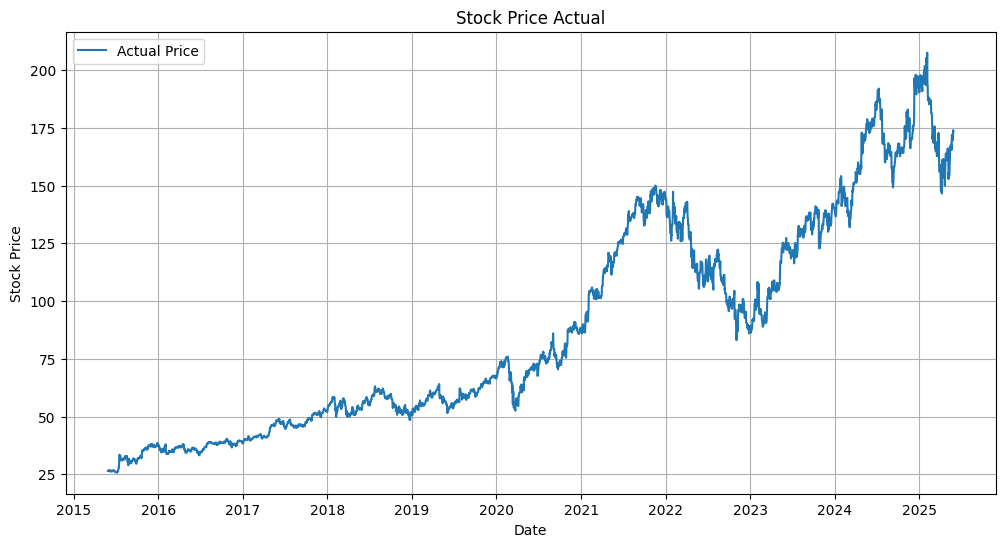

In [7]:
# V·∫Ω ƒë·ªì th·ªã gi√° th·ª±c
dates = data.index[:]
plt.figure(figsize=(12, 6))
plt.plot(dates, close_prices, label='Actual Price')
plt.title('Stock Price Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Step 3**: Implement LSTM

In [9]:
# L·ªõp LSTM t√πy ch·ªânh k·∫ø th·ª´a t·ª´ tf.keras.layers.Layer
class CustomLSTM(tf.keras.layers.Layer):
    def __init__(self, units, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        self.units = units  # s·ªë l∆∞·ª£ng ƒë∆°n v·ªã ·∫©n (neurons)
        self.return_sequences = return_sequences  # c√≥ tr·∫£ v·ªÅ to√†n b·ªô chu·ªói hay ch·ªâ b∆∞·ªõc cu·ªëi

    def build(self, input_shape):
        self.input_dim = input_shape[-1]  # s·ªë chi·ªÅu c·ªßa ƒë·∫ßu v√†o t·∫°i m·ªói b∆∞·ªõc th·ªùi gian

        # Ma tr·∫≠n tr·ªçng s·ªë cho ƒë·∫ßu v√†o x_t
        self.W_f = self.add_weight(shape=(self.input_dim, self.units), initializer="glorot_uniform", name="W_f")  # forget gate
        self.W_i = self.add_weight(shape=(self.input_dim, self.units), initializer="glorot_uniform", name="W_i")  # input gate
        self.W_c = self.add_weight(shape=(self.input_dim, self.units), initializer="glorot_uniform", name="W_c")  # candidate cell
        self.W_o = self.add_weight(shape=(self.input_dim, self.units), initializer="glorot_uniform", name="W_o")  # output gate

        # Ma tr·∫≠n tr·ªçng s·ªë cho tr·∫°ng th√°i ·∫©n h_t
        self.U_f = self.add_weight(shape=(self.units, self.units), initializer="orthogonal", name="U_f")
        self.U_i = self.add_weight(shape=(self.units, self.units), initializer="orthogonal", name="U_i")
        self.U_c = self.add_weight(shape=(self.units, self.units), initializer="orthogonal", name="U_c")
        self.U_o = self.add_weight(shape=(self.units, self.units), initializer="orthogonal", name="U_o")

        # C√°c bias cho t·ª´ng c·ªïng
        self.b_f = self.add_weight(shape=(self.units,), initializer="zeros", name="b_f")
        self.b_i = self.add_weight(shape=(self.units,), initializer="zeros", name="b_i")
        self.b_c = self.add_weight(shape=(self.units,), initializer="zeros", name="b_c")
        self.b_o = self.add_weight(shape=(self.units,), initializer="zeros", name="b_o")

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]      # s·ªë l∆∞·ª£ng m·∫´u trong batch
        time_steps = inputs.shape[1]          # s·ªë b∆∞·ªõc th·ªùi gian (sequence length)
        h_t = tf.zeros((batch_size, self.units))  # kh·ªüi t·∫°o tr·∫°ng th√°i ·∫©n ban ƒë·∫ßu h_0
        c_t = tf.zeros((batch_size, self.units))  # kh·ªüi t·∫°o tr·∫°ng th√°i √¥ nh·ªõ ban ƒë·∫ßu c_0
        outputs = []  # l∆∞u t·∫•t c·∫£ hidden states theo th·ªùi gian

        # Duy·ªát qua t·ª´ng b∆∞·ªõc th·ªùi gian
        for t in range(time_steps):
            x_t = inputs[:, t, :]  # l·∫•y ƒë·∫ßu v√†o t·∫°i th·ªùi ƒëi·ªÉm t

            # T√≠nh to√°n c√°c c·ªïng
            f_t = tf.sigmoid(tf.matmul(x_t, self.W_f) + tf.matmul(h_t, self.U_f) + self.b_f)  # c·ªïng qu√™n
            i_t = tf.sigmoid(tf.matmul(x_t, self.W_i) + tf.matmul(h_t, self.U_i) + self.b_i)  # c·ªïng ƒë·∫ßu v√†o
            o_t = tf.sigmoid(tf.matmul(x_t, self.W_o) + tf.matmul(h_t, self.U_o) + self.b_o)  # c·ªïng ƒë·∫ßu ra
            c_hat_t = tf.tanh(tf.matmul(x_t, self.W_c) + tf.matmul(h_t, self.U_c) + self.b_c)  # gi√° tr·ªã √¥ nh·ªõ ·ª©ng vi√™n

            # C·∫≠p nh·∫≠t tr·∫°ng th√°i √¥ nh·ªõ v√† tr·∫°ng th√°i ·∫©n
            c_t = f_t * c_t + i_t * c_hat_t  # c√¥ng th·ª©c c·∫≠p nh·∫≠t tr·∫°ng th√°i √¥ nh·ªõ
            h_t = o_t * tf.tanh(c_t)         # c√¥ng th·ª©c c·∫≠p nh·∫≠t tr·∫°ng th√°i ·∫©n

            outputs.append(h_t)  # l∆∞u tr·∫°ng th√°i ·∫©n hi·ªán t·∫°i

        # K·∫øt qu·∫£ c√≥ shape (batch_size, time_steps, units)
        outputs = tf.stack(outputs, axis=1)

        if self.return_sequences:
            return outputs            # tr·∫£ v·ªÅ to√†n b·ªô chu·ªói c√°c tr·∫°ng th√°i ·∫©n
        else:
            return outputs[:, -1, :]  # ch·ªâ tr·∫£ v·ªÅ tr·∫°ng th√°i ·∫©n cu·ªëi c√πng (cu·ªëi chu·ªói)


In [22]:
# Step 3: Build LSTM model
def build_model(input_shape, units=50):
    model = Sequential() # gi√∫p x·∫øp c√°c l·ªõp
    model.add(CustomLSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(CustomLSTM(units, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

**Step 3.2**: Option s·ª≠ d·ª•ng LSTM c·ªßa th∆∞ vi·ªán (nhanh h∆°n) (kh√¥ng ch·∫°y ƒëo·∫°n code n√†y khi ƒë√£ ch·∫°y ph·∫ßn Step 3 v√† ng∆∞·ª£c l·∫°i)


In [8]:
# Step 3.2: Build LSTM model using library
def build_model(input_shape, units=50):
    model = Sequential() # gi√∫p x·∫øp c√°c l·ªõp
    model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

**Step 4**: T·ªëi ∆∞u h√≥a b·∫±ng GA

In [9]:
# Prepare data
def create_dataset(data, window_size=60): # k√≠ch th∆∞·ªõc c·ªßa s·ªï m·∫∑c ƒë·ªãnh(n·∫øu kh√¥ng truy·ªÅn v√†o th√¨ window_size=60)
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

**√ù t∆∞·ªüng**: t·ªëi ∆∞u b·ªô tham s·ªë (window_size, units) s·ª≠ d·ª•ng GA v·ªõi s·ªë th·∫ø h·ªá l√† 5, s·ªë c√° th·ªÉ c·ªßa m·ªói th·∫ø h·ªá l√† 30, t·ªâ l·ªá lai gh√©p: 0.8, t·ªâ l·ªá ƒë·ªôt bi·∫øn: 0.05. Kh√¥ng gian t√¨m ki·∫øm: 180 * 4 = 720 (180 gi√° tr·ªã window_size, 4 gi√° tr·ªã units)
Chi·∫øn l∆∞·ª£c ch·ªçn th·∫ø h·ªá sau: Gi·ªØ l·∫°i 1/ 6 th·∫ø h·ªá tr∆∞·ªõc c√≥ fitness t·ªët nh·∫•t(5 c√° th·ªÉ), Ch·ªçn 2/3 c√° th·ªÉ t·ªët nh·∫•t ·ªü th·∫ø h·ªá tr∆∞·ªõc(20 c√° th·ªÉ) ƒë·ªÉ ch·ªçn ng·∫´u nhi√™n trong ƒë√≥ 2 c√° th·ªÉ ƒë·ªÉ lai gh√©p(n·∫øu c√≥), sau ƒë√≥ cho c√° th·ªÉ con ƒë·ªôt bi·∫øn(n·∫øu c√≥). L·∫∑p l·∫°i qu√° tr√¨nh cho ƒë·∫øn khi ƒë·ªß s·ªë l∆∞·ª£ng c√° th·ªÉ(30 c√° th·ªÉ) cho th·∫ø h·ªá ti·∫øp theo.

In [13]:
# L·∫•y d·ªØ li·ªáu g·ªëc
close_prices = data['Close'].values.reshape(-1, 1)
total_len = len(close_prices)

# Chia theo 80% train, 10% val, 10% test
train_end = int(0.8 * total_len)
val_end = int(0.9 * total_len)

# ‚ö†Ô∏è Gi·ªØ l·∫°i 90 ng√†y tr∆∞·ªõc khi chia ƒë·ªÉ ƒë·ªß cho m·ªçi window_size
max_window_size = 90
train_raw = close_prices[:train_end]
val_raw = close_prices[train_end - max_window_size:val_end]
test_raw = close_prices[val_end - max_window_size:]

# Chu·∫©n h√≥a
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_raw)
val_scaled = scaler.transform(val_raw)
test_scaled = scaler.transform(test_raw)


In [ ]:
# Step 4: Genetic Algorithm for hyperparameter tuning
def genetic_algorithm(population_size=10, max_generations=30, mutation_rate=0.1, crossover_rate=0.8, patience=5, target_mse=0.001, no_improve_count=0, select_top_k = 2, select_top_n_crossover=6): # C√°c th√¥ng s·ªë trong GA
    # --------------------------
    # 1. Create a random individual
    def create_individual():
        return {
            'window_size': random.randint(30, 90), # K√≠ch th∆∞·ªõc c·ª≠a s·ªï ch·ªçn t·ª´ 30 ƒë·∫øn 90 ng√†y (c√≥ th·ªÉ thay ƒë·ªïi)
            'units': random.choice([32, 64, 128]) # S·ªë units tr√™n 1 l·ªõp LSTM. Ch·ªçn c√°c s·ªë n√†y l√† v√¨ GPU, TPU t√≠nh to√°n hi·ªáu qu·∫£ h∆°n v·ªõi c√°c gi√° tr·ªã unit l√† b·ªôi c·ªßa 32
        }

    # --------------------------
    # 2. Evaluate fitness (lower MSE is better)
    def fitness(ind):
        window_size = ind['window_size']
        units = ind['units']
        # T·∫°o dataset t·ª´ t·∫≠p ƒë√£ chia & chu·∫©n h√≥a
        X_train, y_train = create_dataset(train_scaled, window_size)
        X_val, y_val = create_dataset(val_scaled, window_size)

        model = build_model((window_size, 1), units=units)
        model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)
        preds = model.predict(X_val)

        mse = mean_squared_error(y_val, preds)
        return mse
# t√≠nh MSE (fitness ƒë·ªãnh nghƒ©a ·ªü ƒë√¢y th√¨ c√° th·ªÉ c√≥ fitness c√†ng nh·ªè th√¨ c√° th·ªÉ ƒë√≥ c√†ng t·ªët)  t·ªïng sigma (y_val_gen -preds)^2 MSE

    # --------------------------
    # 3. Selection: sort by fitness (elitism: top N)
    def selection(population, scores, num_elites=select_top_k):
        sorted_pop = [x for _, x in sorted(zip(scores, population))]
        return sorted_pop[:num_elites] # l·∫•y tr∆∞·ªõc 15 c√° th·ªÉ t·ªët nh·∫•t (fitness th·∫•p nh·∫•t)

    # --------------------------
    # 4. Crossover: combine 2 parents into 1 child
    def crossover(parent1, parent2):
        if random.random() < crossover_rate: # n·∫øu random ra < t·ªâ l·ªá lai gh√©p th√¨ cho lai.
            return {
                'window_size': random.choice([parent1['window_size'], parent2['window_size']]),
                'units': random.choice([parent1['units'], parent2['units']])
            }
        else:
            # No crossover, just clone one of the parents(n·∫øu ko th√¨ ko l√†m g√¨)
            return random.choice([parent1, parent2]).copy()


    # --------------------------
    # 5. Mutation: randomly alter genes
    def mutate(ind):
        if random.random() < mutation_rate: # random ra nh·ªè h∆°n t·ªâ l·ªá ƒë·ªôt bi·∫øn th√¨ cho ƒë·ªôt bi·∫øn
            ind['window_size'] = random.randint(30, 90)
        if random.random() < mutation_rate:
            ind['units'] = random.choice([32, 64, 128])
        return ind

    # --------------------------
    # 6. Replacement: create new generation from elites + offspring
    def create_next_generation(elites, population, size, scores):
        next_gen = elites[:]
        sorted_pop = [x for _, x in sorted(zip(scores, population))]
        while len(next_gen) < size:
            parent1, parent2 = random.sample(sorted_pop[:select_top_n_crossover], 2) # ch·ªçn 4 c√° th·ªÉ t·ªët nh·∫•t xong ch·ªçn 2 b·ªë m·∫π. R·ªìi ti·∫øn h√†nh lai gh√©p, ƒë·ªôt bi·∫øn n·∫øu c√≥.
            child = crossover(parent1, parent2) # lai gh√©p
            child = mutate(child) # ƒë·ªôt bi·∫øn
            next_gen.append(child) # th√™m v√†o th·∫ø h·ªá sau
        return next_gen

    # --------------------------
    # 7. Repeat over generations
    population = [create_individual() for _ in range(population_size)]
    best_individual = None
    best_score = float('inf')

    for gen in range(max_generations):
        print(f"\n Generation {gen+1}")
        scores = [fitness(ind) for ind in population]
        for i, (ind, score) in enumerate(zip(population, scores)):
            print(f"Individual {i+1}: window_size={ind['window_size']}, units={ind['units']}, MSE={score:.6f}")

        elites = selection(population, scores, num_elites=select_top_k)
        best_elite = elites[0]
        best_elite_score = scores[population.index(best_elite)]  # l·∫•y ƒë√∫ng fitness ƒë√£ t√≠nh
        print(f"Best individual of generation {gen+1}: window_size={best_elite['window_size']}, units={best_elite['units']}, MSE={best_elite_score:.6f}")

        if best_elite_score < best_score: # l·∫•y c√° th·ªÉ t·ªët nh·∫•t trong t·∫•t c·∫£ nh·ªØng l·∫ßn lai gh√©p
            best_score = best_elite_score
            best_individual = best_elite.copy()
        # üî∏ ƒêi·ªÅu ki·ªán d·ª´ng s·ªõm
     
        # Ki·ªÉm tra c·∫£i thi·ªán
        if best_elite_score < best_score:
            best_score = best_elite_score
            best_individual = best_elite.copy()
            no_improve_count = 0  # reset b·ªô ƒë·∫øm
        else:
            no_improve_count += 1
            print(f"No improvement for {no_improve_count} generation(s)")

        # üî¥ D·ª™NG S·ªöM n·∫øu kh√¥ng c·∫£i thi·ªán trong `patience` th·∫ø h·ªá
        if no_improve_count >= patience:
            print(f"\nEarly stopping: No improvement in the last {patience} generations.")
            break
        # üî¥ D·ª´ng s·ªõm n·∫øu ƒë·∫°t MSE m·ª•c ti√™u
        if best_elite_score <= target_mse:
            print(f"\n‚úÖ Early stopping: Reached target MSE ‚â§ {target_mse}")
            break


        population = create_next_generation(elites, population, population_size, scores) # t·∫°o th·∫ø h·ªá m·ªõi (g·ªìm 5 c√° th·ªÉ t·ªët nh·∫•t c·ªßa th·∫ø h·ªá tr∆∞·ªõc v√† nh·ªØng c√° th·ªÉ kh√°c ƒë∆∞·ª£c lai gh√©p, ƒë·ªôt bi·∫øn)


    print(f"\n Final best individual: window_size={best_individual['window_size']}, units={best_individual['units']}, MSE={best_score:.6f}")
    return best_individual

Step 5: Ch·∫°y thu·∫≠t to√°n GA ƒë·ªÉ t√¨m ra c√° th·ªÉ t·ªët nh·∫•t

In [39]:
# GA optimization
best_params = genetic_algorithm(population_size=10, select_top_k=2, select_top_n_crossover=6)
print("Best Parameters from GA:", best_params)


 Generation 1
12/12 [==============================] - 1s 9ms/step
Individual 1: window_size=72, units=64, MSE=0.001420
Individual 2: window_size=77, units=128, MSE=0.001208
Individual 3: window_size=62, units=32, MSE=0.001365
Individual 4: window_size=51, units=128, MSE=0.002681
Individual 5: window_size=31, units=128, MSE=0.001129
Individual 6: window_size=65, units=32, MSE=0.003410
Individual 7: window_size=85, units=64, MSE=0.003538
Individual 8: window_size=36, units=32, MSE=0.003208
Individual 9: window_size=84, units=64, MSE=0.005458
Individual 10: window_size=78, units=32, MSE=0.003299
Best individual of generation 1: window_size=31, units=128, MSE=0.001129
No improvement for 1 generation(s)

 Generation 2
14/14 [==============================] - 1s 10ms/step
Individual 1: window_size=31, units=128, MSE=0.001449
Individual 2: window_size=77, units=128, MSE=0.011616
Individual 3: window_size=77, units=64, MSE=0.003929
Individual 4: window_size=36, units=32, MSE=0.011826
Individ

**Step 6**: Hu·∫•n luy·ªán v√† t√≠nh RMSE ƒë·ªëi v·ªõi c√° th·ªÉ t·ªët nh·∫•t ƒë∆∞·ª£c ch·ªçn

In [40]:
from keras.callbacks import EarlyStopping

# 1. L·∫•y d·ªØ li·ªáu g·ªëc (ch∆∞a chu·∫©n h√≥a)
close_prices = data['Close'].values.reshape(-1, 1)

# 2. Chia d·ªØ li·ªáu theo t·ªâ l·ªá 80% train, 10% val, 10% test
total_len = len(close_prices)
train_end = int(total_len * 0.8)
val_end = int(total_len * 0.9)

train_prices = close_prices[:train_end]
val_prices = close_prices[train_end - best_params['window_size']:val_end]
test_prices = close_prices[val_end - best_params['window_size']:]  # gi·ªØ l·∫°i window_size ng√†y

# 3. Fit scaler tr√™n t·∫≠p train v√† transform c·∫£ 3 ph·∫ßn
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_prices)
scaled_val = scaler.transform(val_prices)
scaled_test = scaler.transform(test_prices)

# 4. T·∫°o dataset
X_train, y_train = create_dataset(scaled_train, best_params['window_size'])
X_val, y_val = create_dataset(scaled_val, best_params['window_size'])
X_test, y_test = create_dataset(scaled_test, best_params['window_size'])

# 5. G·ªôp train + val ƒë·ªÉ train m√¥ h√¨nh cu·ªëi c√πng
X_final_train = np.concatenate([X_train, X_val])
y_final_train = np.concatenate([y_train, y_val])

# 6. X√¢y m√¥ h√¨nh
model = build_model((best_params['window_size'], 1), best_params['units'])

# 7. EarlyStopping (monitor tr√™n `loss` v√¨ kh√¥ng c√≥ val)
early_stop = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

# 8. Hu·∫•n luy·ªán tr√™n train + val
model.fit(
    X_final_train, y_final_train,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

# 9. D·ª± ƒëo√°n tr√™n test set v√† t√≠nh RMSE
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("‚úÖ Test RMSE:", rmse)

Epoch 1/100
102/102 [==============================] - 8s 25ms/step - loss: 0.0086
Epoch 2/100
102/102 [==============================] - 2s 19ms/step - loss: 0.0021
Epoch 3/100
102/102 [==============================] - 2s 22ms/step - loss: 0.0020
Epoch 4/100
102/102 [==============================] - 2s 20ms/step - loss: 0.0017
Epoch 5/100
102/102 [==============================] - 2s 20ms/step - loss: 0.0019
Epoch 6/100
102/102 [==============================] - 2s 21ms/step - loss: 0.0018
Epoch 7/100
102/102 [==============================] - 2s 18ms/step - loss: 0.0015
Epoch 8/100
102/102 [==============================] - 2s 21ms/step - loss: 0.0015
Epoch 9/100
102/102 [==============================] - 2s 19ms/step - loss: 0.0016
Epoch 10/100
102/102 [==============================] - 2s 19ms/step - loss: 0.0015
Epoch 11/100
102/102 [==============================] - 2s 17ms/step - loss: 0.0014
Epoch 12/100
102/102 [==============================] - 2s 18ms/step - loss: 0.0012
E

12/12 [==============================] - 0s 8ms/step


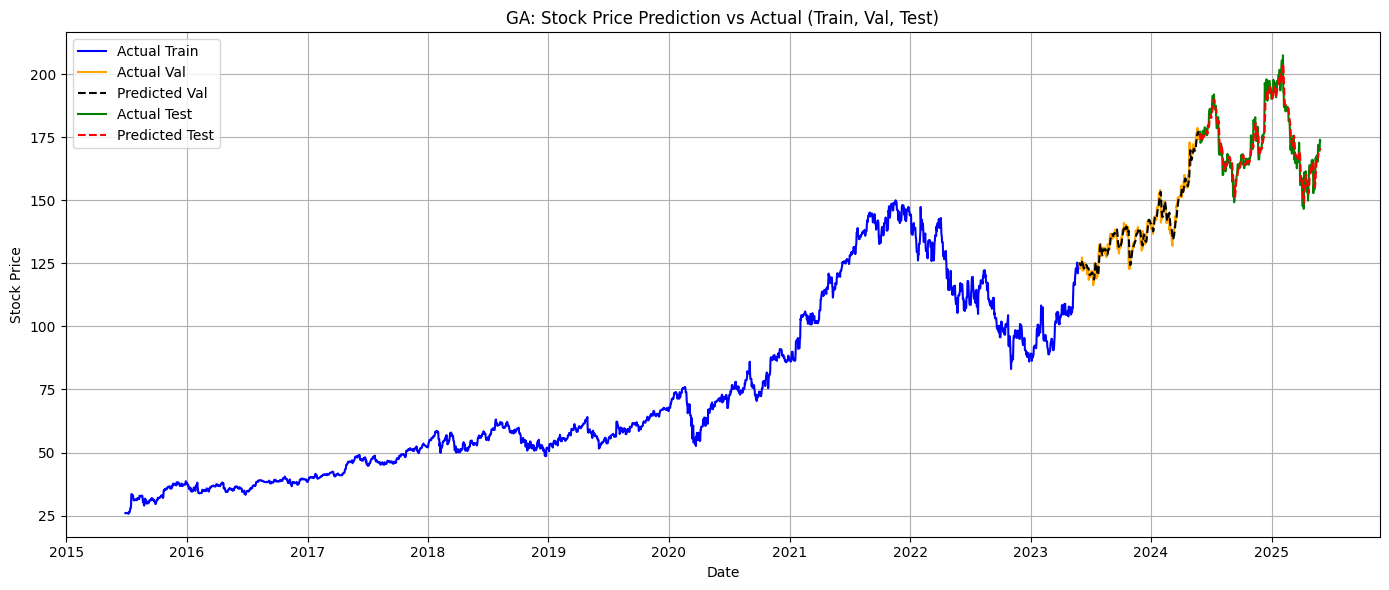

In [41]:
# D·ª± ƒëo√°n t·ª´ng ph·∫ßn
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Inverse transform c√°c ph·∫ßn
y_train_rescaled = scaler.inverse_transform(y_train)
train_preds_rescaled = scaler.inverse_transform(train_preds)

y_val_rescaled = scaler.inverse_transform(y_val)
val_preds_rescaled = scaler.inverse_transform(val_preds)

y_test_rescaled = scaler.inverse_transform(y_test)
test_preds_rescaled = scaler.inverse_transform(test_preds)

# L·∫•y index ng√†y t∆∞∆°ng ·ª©ng
train_start = best_params['window_size']
val_start = train_end
test_start = val_end

train_dates = data.index[train_start:train_start + len(y_train)]
val_dates = data.index[val_start:val_start + len(y_val)]
test_dates = data.index[test_start:test_start + len(y_test)]

# V·∫Ω bi·ªÉu ƒë·ªì chung
plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_rescaled, label='Actual Train', color='blue')
#plt.plot(train_dates, train_preds_rescaled, label='Predicted Train', color='black', linestyle='--')

plt.plot(val_dates, y_val_rescaled, label='Actual Val', color='orange')
plt.plot(val_dates, val_preds_rescaled, label='Predicted Val', color='black', linestyle='--')

plt.plot(test_dates, y_test_rescaled, label='Actual Test', color='green')
plt.plot(test_dates, test_preds_rescaled, label='Predicted Test', color='red', linestyle='--')

plt.title('GA: Stock Price Prediction vs Actual (Train, Val, Test)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


12/12 [==============================] - 0s 22ms/step
ƒê·ªô sai s·ªë trung b√¨nh tr√™n t·∫≠p validation: 1.8714648103060787 dolar


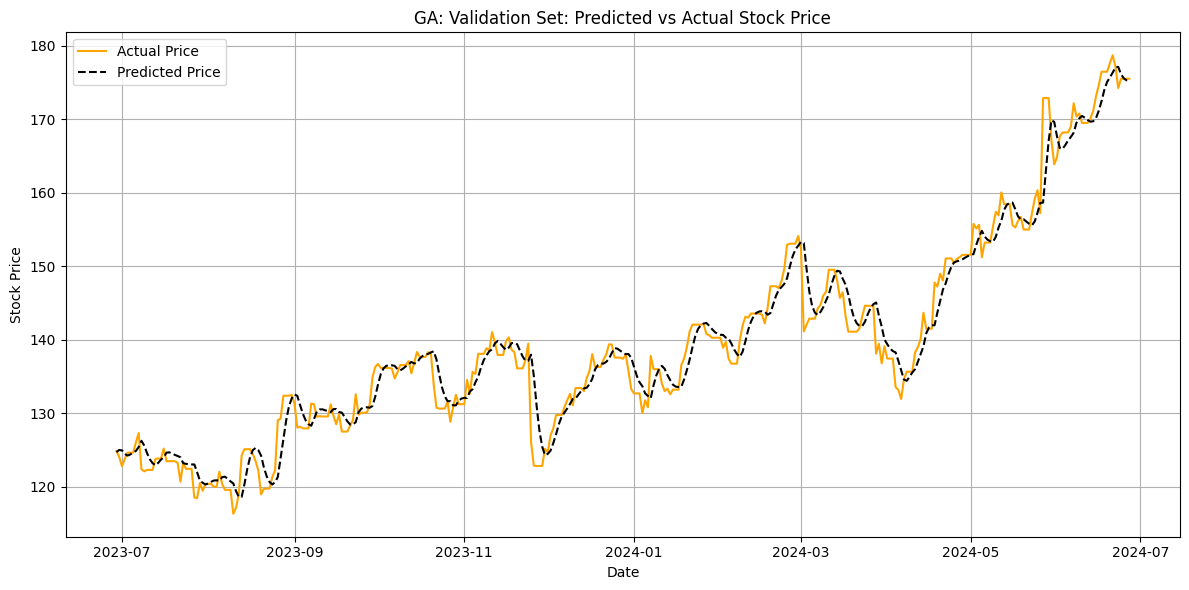

In [42]:
# D·ª± ƒëo√°n tr√™n t·∫≠p validation
val_preds = model.predict(X_val)

# Inverse transform y_val v√† d·ª± ƒëo√°n
y_val_rescaled = scaler.inverse_transform(y_val)
val_preds_rescaled = scaler.inverse_transform(val_preds)

# MAE tr√™n t·∫≠p validation
val_mae = np.mean(np.abs(y_val_rescaled - val_preds_rescaled))
print("ƒê·ªô sai s·ªë trung b√¨nh tr√™n t·∫≠p validation:", val_mae, "dolar")

# L·∫•y index ng√†y ƒë√∫ng cho t·∫≠p validation
val_start_index = train_end + best_params['window_size']
val_dates = data.index[val_start_index : val_start_index + len(y_val)]

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 6))
plt.plot(val_dates, y_val_rescaled, label='Actual Price', color='orange')
plt.plot(val_dates, val_preds_rescaled, label='Predicted Price', color='black', linestyle='--')
plt.title('GA: Validation Set: Predicted vs Actual Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ƒê·ªô sai s·ªë trung b√¨nh tr√™n t·∫≠p test: 2.6269286525705473 dolar
MAPE tr√™n t·∫≠p test: 1.52%


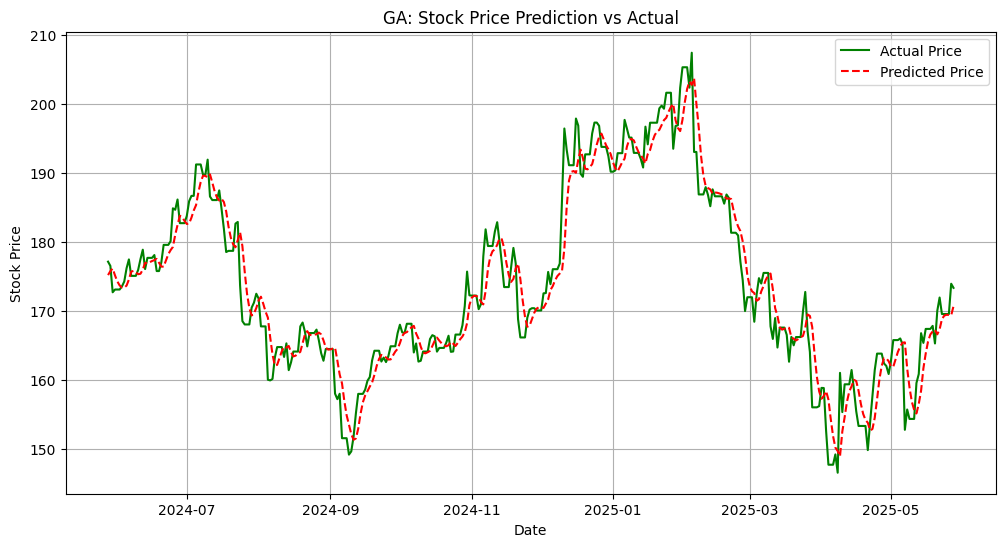

In [43]:
# Plot predictions vs actual
y_test_rescaled = scaler.inverse_transform(y_test)
preds_rescaled = scaler.inverse_transform(preds)
mae = np.mean(np.abs(y_test_rescaled- preds_rescaled))
print("ƒê·ªô sai s·ªë trung b√¨nh tr√™n t·∫≠p test:", mae, "dolar")
mape = np.mean(np.abs((y_test_rescaled - preds_rescaled) / y_test_rescaled)) * 100 # T·ª∑ l·ªá ph·∫ßn trƒÉm sai s·ªë trung b√¨nh
print(f"MAPE tr√™n t·∫≠p test: {mape:.2f}%")
# Get the corresponding dates for the last 100 entries (the test set)
dates = data.index[-len(y_test):]  # data is the original DataFrame from yfinance
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_rescaled, label='Actual Price', color='green')
plt.plot(dates, preds_rescaled, label='Predicted Price', color='red', linestyle='--')
plt.title('GA: Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Step 8**: V·∫Ω ƒë·ªì th·ªã 100 ng√†y g·∫ßn nh·∫•t

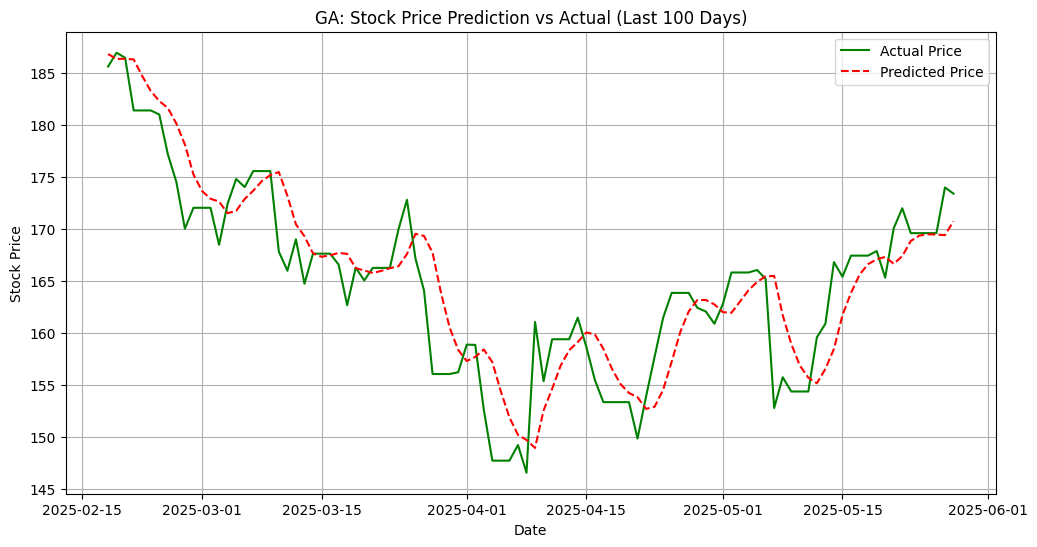

In [44]:
# Ch·ªâ l·∫•y 100 m·∫´u cu·ªëi c√πng
num_plot = 100
y_test_subset = y_test[-num_plot:]
preds_subset = preds[-num_plot:]

# Bi·∫øn ƒë·ªïi ng∆∞·ª£c l·∫°i gi√° g·ªëc
y_test_rescaled = scaler.inverse_transform(y_test_subset)
preds_rescaled = scaler.inverse_transform(preds_subset)

# L·∫•y ƒë√∫ng 100 ng√†y cu·ªëi t∆∞∆°ng ·ª©ng trong d·ªØ li·ªáu g·ªëc
dates = data.index[-num_plot:]

# V·∫Ω ƒë·ªì th·ªã
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test_rescaled, label='Actual Price', color='green')
plt.plot(dates, preds_rescaled, label='Predicted Price', color='red', linestyle='--')
plt.title('GA: Stock Price Prediction vs Actual (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


**Step 9:** D·ª± ƒëo√°n gi√° nh·ªØng ng√†y sau ƒë√≥ (Ch∆∞a c√≥ d·ªØ li·ªáu th·ª±c)



In [ ]:
def predict_next_days(model, last_sequence, days_to_predict=30, scaler=None):
    """
    D·ª± ƒëo√°n `days_to_predict` ng√†y ti·∫øp theo d·ª±a v√†o chu·ªói ƒë·∫ßu v√†o `last_sequence`.
    Tr·∫£ v·ªÅ danh s√°ch c√°c gi√° tr·ªã th·ª±c t·∫ø (ƒë√£ inverse_transform n·∫øu c·∫ßn).
    """
    predicted = []
    current_input = last_sequence.reshape(1, last_sequence.shape[0], 1)

    for _ in range(days_to_predict):
        next_price = model.predict(current_input, verbose=0)[0][0]
        predicted.append(next_price)
        current_input = np.append(current_input[:, 1:, :], [[[next_price]]], axis=1)

    if scaler:
        predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

    return predicted


In [ ]:
# L·∫•y ng√†y cu·ªëi c√πng trong d·ªØ li·ªáu yfinance
last_date = data.index[-1]

# T·∫°o 30 ng√†y l√†m vi·ªác ti·∫øp theo (b·ªè cu·ªëi tu·∫ßn)
future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=30)


In [ ]:
# L·∫•y chu·ªói g·∫ßn nh·∫•t
last_sequence = scaled_test[-best_params['window_size']:]

# D·ª± ƒëo√°n 30 ng√†y t·ªõi
predicted_prices = predict_next_days(model, last_sequence, days_to_predict=30, scaler=scaler)

# In k·∫øt qu·∫£ theo ng√†y
for date, price in zip(future_dates, predicted_prices):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")


In [ ]:
# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predicted_prices, label='Predicted Price (Next 30 Days)', color='orange')
plt.title('Predicted Stock Prices for Next 30 Business Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Step 10**: Th√™m v√≤ng for ƒë·ªÉ d·ª± ƒëo√°n nhi·ªÅu lo·∫°i c·ªï phi·∫øu (Code y nh∆∞ ph·∫ßn d·ª± ƒëo√°n 1 c·ªï phi·∫øu ch·ªâ th√™m v√≤ng for)

In [ ]:
symbols = ["AAPL", "GOOG", "MSFT", "AMZN"]

In [ ]:
for symbol in symbols:
    print(f"\n========= Processing {symbol} =========")

    # code n√†y y nh∆∞ ph·∫ßn tr√™n
    #1. Ti·ªÅn x·ª≠ l√≠
    data = download_stock_data(symbol)
    data = data.asfreq('D')
    data = data.fillna(method='ffill')
    # T√¨m gi√° tr·ªã t·ªëi ∆∞u
    best_params = genetic_algorithm()
    print("Best Parameters from GA:", best_params)

    # 2. Chia d·ªØ li·ªáu tr∆∞·ªõc khi scale
    split_index = int(len(close_prices) * 0.8)
    train_prices = close_prices[:split_index]
    test_prices = close_prices[split_index - best_params['window_size']:]

    # 3. Fit scaler tr√™n t·∫≠p train v√† transform c·∫£ hai ph·∫ßn
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_prices)
    scaled_test = scaler.transform(test_prices)

    # 4. T·∫°o dataset
    X_train_final, y_train_final = create_dataset(scaled_train, best_params['window_size'])
    X_test, y_test = create_dataset(scaled_test, best_params['window_size'])

    model = build_model((best_params['window_size'], 1), best_params['units'])
    model.fit(X_train_final, y_train_final, epochs=30, batch_size=32, verbose=1)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print("Test RMSE:", rmse)

    y_test_rescaled = scaler.inverse_transform(y_test)
    preds_rescaled = scaler.inverse_transform(preds)
    dates = data.index[-len(y_test):]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, y_test_rescaled, label='Actual Price')
    plt.plot(dates, preds_rescaled, label='Predicted Price')
    plt.title(f'{symbol} Stock Price Prediction vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()
